# Der Untergang der AfD
> Umfragewerte der AfD von verschiedenen Quellen, täglich aktualisiert

- comments: true
- author: Caglar Cakan
- categories: [data]
- permalink: /afd-data/
- image: images/icon_afd.png
- license: Creative Commons

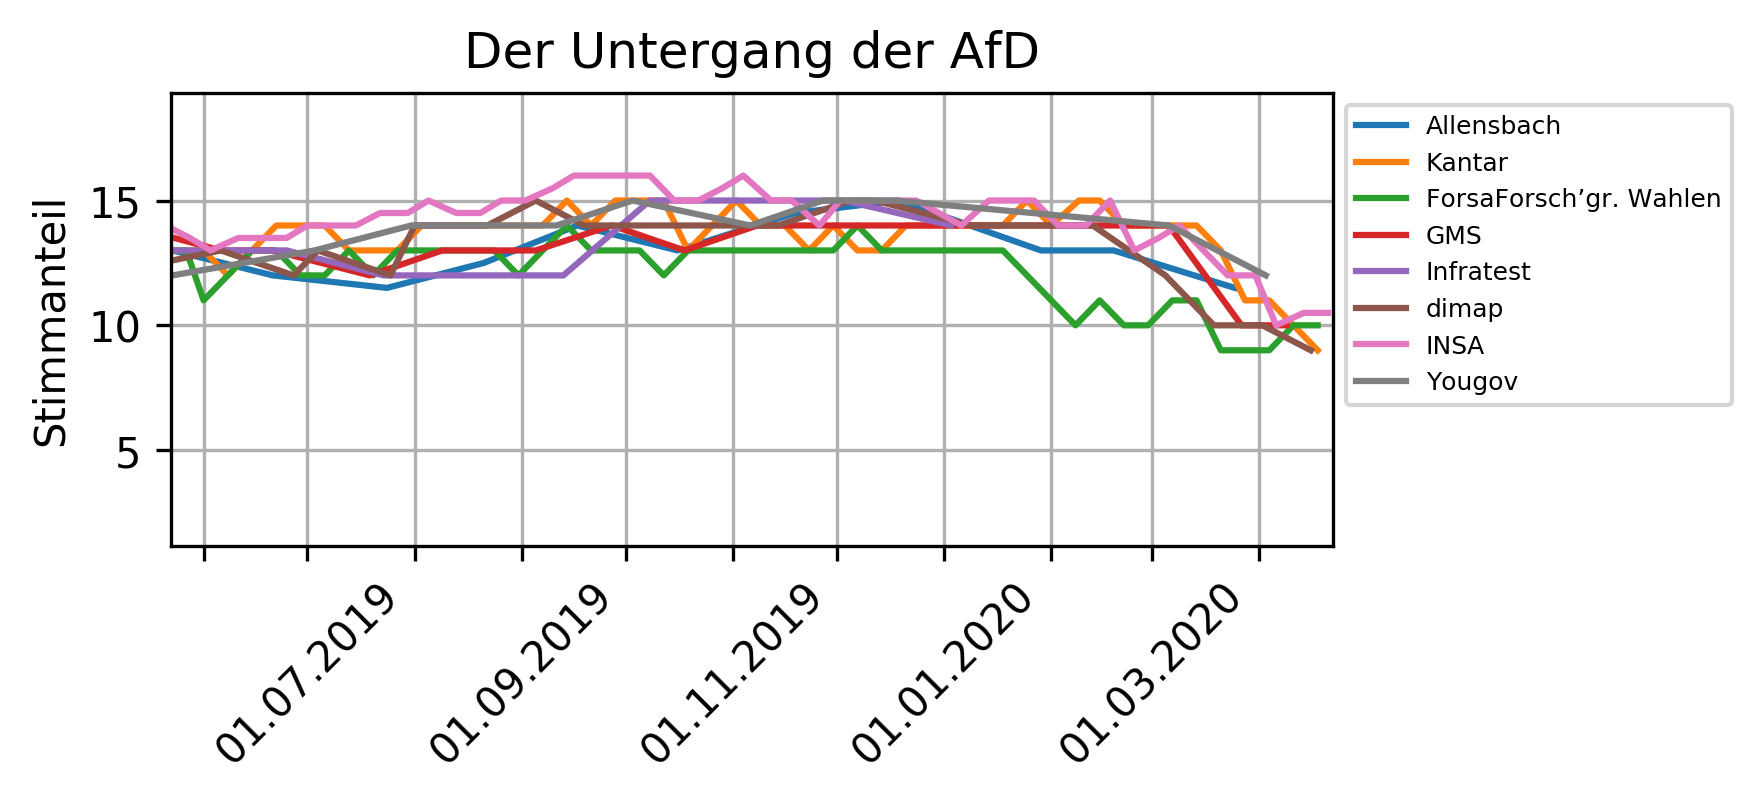

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

table_urls = ["https://www.wahlrecht.de/umfragen/allensbach.htm",
              "https://www.wahlrecht.de/umfragen/emnid.htm",
              "https://www.wahlrecht.de/umfragen/forsa.htm",
              "https://www.wahlrecht.de/umfragen/politbarometer.htm",
              "https://www.wahlrecht.de/umfragen/gms.htm",
              "https://www.wahlrecht.de/umfragen/dimap.htm",
              "https://www.wahlrecht.de/umfragen/insa.htm",
              "https://www.wahlrecht.de/umfragen/yougov.htm"]
names = ["Allensbach", "Kantar", "Forsa" "Forsch’gr. Wahlen", "GMS", "Infratest", "dimap", "INSA", "Yougov"]

plt.figure(figsize=(5, 2), dpi=300)
plt.title("Der Untergang der AfD")
for i, table_url in enumerate(table_urls):
    df = pd.read_html(table_url)[1]
    # cut last 4 lines which are trash
    df = df.iloc[:-4]
    #dates = df["Datum"]if "Datum" in df.columns else df["Unnamed: 0"]
    # clean data
    df = df[~df.AfD.str.contains("INSA")]
    df = df[~df.AfD.str.contains("–")]
    # convert to datetime
    df["Datetime"] = pd.to_datetime(df["Datum"], format="%d.%m.%Y") if "Datum" in df.columns else pd.to_datetime(df["Unnamed: 0"], format="%d.%m.%Y")
    # convert percentage strings from @="12,5%" to floats
    df["AfD_percent"] = df["AfD"].str.replace(',', '.').str.rstrip('%').astype('float')
    plt.plot(df["Datetime"], df["AfD_percent"], label=names[i])
    
    plt.xlim([datetime.datetime.now() - datetime.timedelta(weeks=12*4), datetime.datetime.now()])
    
myFmt = mdates.DateFormatter("%d.%m.%Y")
plt.gca().xaxis.set_major_formatter(myFmt)    
plt.grid()
plt.legend(fontsize=6, bbox_to_anchor=(1.0, 1.0))
plt.ylabel("Stimmanteil")
plt.setp(plt.gca().get_xticklabels()[::2], visible=False)
plt.xticks(rotation=45);